<a href="https://colab.research.google.com/github/MilanCugur/PUBLISH_ME/blob/master/ETH_Zurich_Clustering_Knn_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
import numpy as np
from zipfile import ZipFile

from keras.utils import Sequence
from random import shuffle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [3]:
%%time
# Extract images to 'ImageDisk' folder

path = './drive/My Drive/Eth_Zurich_Dataset/ETH_png_archive.zip'  # Different .zip folder with images
archive = ZipFile(path, 'r')
archive.extractall('./ImageDisk')  
archive.close()

CPU times: user 28.7 s, sys: 14.4 s, total: 43.1 s
Wall time: 45.9 s


In [4]:
!ls ImageDisk/ | wc -l

369455


# OneHot Encoding

In [0]:
# OneHot Encoding
class OneHot():  
  # classes = list of classes : 0-9, a-z, A-Z
  # n = number of classes     : 62
  
  def __init__(self, classes):
    self.classes = classes
    self.n = len(classes)
    
  def encode(self, class_name):
    one_hot = np.zeros(shape=(self.n), dtype=np.int8)
    class_index = self.classes.index(class_name)
    one_hot[class_index] = 1
    return one_hot
  
  def encode_all(self, list_class_names):
    return np.array([self.encode(class_name) for class_name in list_class_names])
  
  def decode(self, one_hot):
    class_index = one_hot.argmax()
    return self.classes[class_index]
  
  def decode_all(self, list_one_hots):
    return np.array([self.decode(one_hot) for one_hot in list_one_hots])

In [7]:
alphabet = list("0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'.,-()/") 
alphabet.insert(0, '') # '\x00' character, i.e., ord(0) to label concatenations.
print(alphabet)
print(len(alphabet))

['', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', "'", '.', ',', '-', '(', ')', '/']
70


In [0]:
OH_L = OneHot(sorted(alphabet))

# Data

In [0]:
writers = {}
labels = set()
for image in os.listdir('./ImageDisk/'):
  imageparsed = image.split('_')  # ['trainimage', 'i28871', 'w10174', 'lo', '261-274.png']
  writer = int(imageparsed[2][1:])
  label = imageparsed[3][1:]
  if writer not in writers:
    writers[writer] = 1
  else:
    writers[writer] += 1
    
  labels.add(label)

In [10]:
print(labels)
print(len(labels))

{'', 'Y', 'e', 'y', 'D', 'C', 'W', '.', 'z', 'X', '5', 'c', '6', 'p', 'h', 'm', 't', ',', 'x', 'E', 'd', 'B', 'S', 'O', 'L', 'K', 'k', 'r', '8', 's', 'a', 'T', 'o', 'u', 'U', '3', '9', 'G', 'J', 'Z', 'v', 'M', 'q', 'b', 'R', '0', 'l', '4', 'i', '1', 'f', '(', 'I', "'", '2', 'w', 'j', 'Q', 'V', 'g', '-', ')', 'N', 'F', 'slash', '7', 'n', 'P', 'A', 'H'}
70


In [11]:
print(len(writers.keys()))

294


In [12]:
writers = list(writers.items())
writers = sorted(writers, key=lambda x: x[1])
print(writers)

[(123483, 182), (123521, 384), (123544, 690), (123528, 801), (123519, 808), (123502, 866), (123461, 880), (10023, 898), (123534, 921), (123485, 930), (123459, 947), (123476, 989), (123546, 999), (123460, 1010), (123518, 1024), (123501, 1028), (123515, 1030), (123545, 1037), (123479, 1047), (10094, 1049), (123499, 1053), (10161, 1054), (10088, 1058), (123524, 1062), (10058, 1065), (123478, 1068), (123482, 1073), (123489, 1090), (123539, 1091), (10096, 1092), (10112, 1093), (10104, 1093), (10070, 1097), (123456, 1097), (10214, 1099), (123527, 1103), (123508, 1104), (10095, 1104), (10066, 1106), (10195, 1109), (123488, 1116), (123540, 1123), (10098, 1125), (123532, 1127), (10127, 1132), (10169, 1133), (10177, 1136), (123471, 1137), (123531, 1139), (10163, 1144), (10156, 1145), (123463, 1149), (10061, 1151), (10062, 1156), (10210, 1156), (10153, 1162), (10102, 1163), (10139, 1164), (123510, 1164), (10131, 1164), (10176, 1165), (123512, 1167), (123504, 1168), (10216, 1168), (123503, 1169), 

In [13]:
N = sum([writer[1] for writer in writers])  # No of images
N

369455

In [14]:
testW = []
countImgs = 0
while countImgs<N*0.1:
  testW.append(writers[-1])
  countImgs += writers[-1][1]
  writers = writers[:-1]
  
print(testW) 
print(len(testW))

[(10143, 1654), (10106, 1626), (10018, 1600), (123505, 1594), (10142, 1589), (10015, 1576), (123541, 1564), (10005, 1539), (10019, 1514), (10021, 1498), (10146, 1495), (10103, 1489), (10014, 1483), (10182, 1478), (10004, 1478), (10017, 1477), (10008, 1467), (10044, 1451), (123526, 1446), (10151, 1443), (10135, 1443), (10212, 1442), (10211, 1439), (123486, 1438), (10010, 1435)]
25


In [0]:
# Split and stratify
# 80% : 10% : 10%
# shuffle(writers)
trainW = []
validationW = []

for i in range(0, len(writers)):
  if i%10==5:
    validationW.append(writers[i])
  else:
    trainW.append(writers[i])

trainW = set(trainW)
validationW = set(validationW)
testW = set(testW)

In [0]:
testW = [x[0] for x in testW]
validationW = [x[0] for x in validationW]
trainW = [x[0] for x in trainW]

In [17]:
print(len(trainW))
print(len(validationW))
print(len(testW))

242
27
25


In [18]:
%%time
train_Images = []
train_Labels = []
train_Writers = []

validation_Images = []
validation_Labels = []
validation_Writers = []

test_Images = []
test_Labels = []
test_Writers = []

images = os.listdir('./ImageDisk/')
shuffle(images)
for image in images:
  imageparsed = image.split('_')  # ['trainimage', 'i28871', 'w10174', 'lo', '261-274.png']
  writer = int(imageparsed[2][1:])
  label = imageparsed[3][1:]
  if label=='slash':
    label = '/'
  img = mpimg.imread(os.path.join('./ImageDisk', image))
  if writer in testW:
    test_Images.append(img.reshape(28, 28, 1)/255.0)
    test_Labels.append(OH_L.encode(label))
    test_Writers.append(writer)
  elif writer in validationW:
    validation_Images.append(img.reshape(28, 28, 1)/255.0)
    validation_Labels.append(OH_L.encode(label))
    validation_Writers.append(writer)
  elif writer in trainW:
    train_Images.append(img.reshape(28, 28, 1)/255.0)
    train_Labels.append(OH_L.encode(label))
    train_Writers.append(writer)
  else:
    print('Unrecognized writer, ', writer)  # Throw exception

CPU times: user 30.2 s, sys: 5.9 s, total: 36.1 s
Wall time: 36.8 s


In [19]:
print(len(train_Writers))
print(len(validation_Writers))
print(len(test_Writers))
print()
print(len(train_Labels))
print(len(validation_Labels))
print(len(test_Labels))
print()
print(len(train_Images))
print(len(validation_Images))
print(len(test_Images))

298313
33484
37658

298313
33484
37658

298313
33484
37658


# Load model

In [20]:
from keras.models import Model
from keras.models import load_model

recognizer = load_model('./drive/My Drive/Eth_Zurich_weights/eth_baseline_model.h5')
finder = Model(inputs=recognizer.input, outputs=recognizer.get_layer('next_to_last').output)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [21]:
recognizer.evaluate(x=np.array(train_Images), y=np.array(train_Labels), batch_size=256, verbose=1)

298313/298313 [==============================] - 9s 31us/step


[0.39942179027257557, 0.876482084246794]

In [23]:
recognizer.evaluate(x=np.array(validation_Images), y=np.array(validation_Labels), batch_size=256, verbose=1)

33484/33484 [==============================] - 1s 22us/step


[0.5743015284051806, 0.8312029626588499]

In [24]:
recognizer.evaluate(x=np.array(test_Images), y=np.array(test_Labels), batch_size=256, verbose=1)

37658/37658 [==============================] - 1s 21us/step


[0.6479861186183679, 0.8211800945445225]

# Clustering by labels + KNN

## Clustering by instances

In [40]:
labels = sorted(alphabet)
print(labels)

['', "'", '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [41]:
IVectors = {}  # Key is 'a', 'b', ...
for l in labels:
  IVectors[l] = []
print(IVectors)

{'': [], "'": [], '(': [], ')': [], ',': [], '-': [], '.': [], '/': [], '0': [], '1': [], '2': [], '3': [], '4': [], '5': [], '6': [], '7': [], '8': [], '9': [], 'A': [], 'B': [], 'C': [], 'D': [], 'E': [], 'F': [], 'G': [], 'H': [], 'I': [], 'J': [], 'K': [], 'L': [], 'M': [], 'N': [], 'O': [], 'P': [], 'Q': [], 'R': [], 'S': [], 'T': [], 'U': [], 'V': [], 'W': [], 'X': [], 'Y': [], 'Z': [], 'a': [], 'b': [], 'c': [], 'd': [], 'e': [], 'f': [], 'g': [], 'h': [], 'i': [], 'j': [], 'k': [], 'l': [], 'm': [], 'n': [], 'o': [], 'p': [], 'q': [], 'r': [], 's': [], 't': [], 'u': [], 'v': [], 'w': [], 'x': [], 'y': [], 'z': []}


In [42]:
%%time

for k in range(0, len(validation_Images)):
  l = OH_L.decode(validation_Labels[k])
  next_to_last = finder.predict(np.array([validation_Images[k]]))[0]
  IVectors[l].append(next_to_last)

CPU times: user 1min 6s, sys: 4.26 s, total: 1min 10s
Wall time: 48.1 s


In [43]:
%%time

for k in range(0, len(train_Images)):
  l = OH_L.decode(train_Labels[k])
  next_to_last = finder.predict(np.array([train_Images[k]]))[0]
  IVectors[l].append(next_to_last)

CPU times: user 10min 2s, sys: 39.3 s, total: 10min 41s
Wall time: 7min 16s


In [44]:
S = 0
for l in IVectors.keys():
  S += len(IVectors[l])
print(S)

331797


In [45]:
print(len(validation_Images))
print(len(train_Images))
print(len(validation_Images)+len(train_Images))

print(labels)
print(len(labels))

33484
298313
331797
['', "'", '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
70


In [46]:
print([len(IVectors[l]) for l in labels])  # broj slika po svakoj labeli

[471, 443, 1, 19, 20, 32, 240, 2, 154, 350, 151, 89, 78, 118, 89, 72, 41, 146, 888, 672, 567, 347, 262, 329, 301, 851, 1240, 191, 86, 312, 706, 359, 357, 352, 34, 276, 882, 1469, 95, 94, 625, 5, 215, 21, 25531, 4636, 8506, 13395, 41317, 7145, 6482, 18761, 21925, 282, 2592, 13053, 7639, 21874, 24547, 5977, 361, 19413, 20109, 28678, 9322, 3052, 6451, 571, 5941, 185]


In [51]:
N_clusters = [int(min(len(IVectors[l]), 30, 1+max(len(IVectors[l])/1000, 4))) for i, l in enumerate(labels)]  # CHANGE THIS!
print(N_clusters)
print(sum(N_clusters))

[5, 5, 1, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 26, 5, 9, 14, 30, 8, 7, 19, 22, 5, 5, 14, 8, 22, 25, 6, 5, 20, 21, 29, 10, 5, 7, 5, 6, 5]
551


In [0]:
from sklearn.cluster import KMeans
ICentroids = {}  # dictionary with centroids for each label
kmeans = None

In [53]:
%%time

for i, l in enumerate(labels):
  if kmeans!=None:
    del kmeans
  kmeans = KMeans(n_clusters=N_clusters[i], n_init=10, max_iter=300, tol=1e-4, precompute_distances=False, verbose=0)  # 15, 250/10, 300
  
  kmeans.fit(IVectors[l])
  ICentroids[l] = kmeans.cluster_centers_

CPU times: user 7min 50s, sys: 50.3 s, total: 8min 40s
Wall time: 7min 12s


In [54]:
ICentroids['A'].shape  # Clusters for 'A'; small check

(5, 256)

In [0]:
# Normalize clusters; Newly added; Quick fix, small improvements; Normalize together ???
for k in ICentroids.keys(): 
  for j in range(0, ICentroids[k].shape[0]):
    ICentroids[k][j] = (ICentroids[k][j] - ICentroids[k][j].mean())/(ICentroids[k][j].std())

In [57]:
from sklearn.neighbors import KNeighborsClassifier  # Estimate the quality of custers
from sklearn.metrics import accuracy_score

Ns = [1,2,3,4,5,7,8,9,10,15]

X_train = []
y_train = []

for l in labels:
  for j in range(0, ICentroids[l].shape[0]):
    X_train.append(ICentroids[l][j])
    y_train.append(l)

for n in Ns:
  knn = KNeighborsClassifier(n_neighbors=n, metric='l2')
  knn.fit(X_train, y_train)
  
  score = accuracy_score(knn.predict(finder.predict(np.array(test_Images))), [x for x in OH_L.decode_all(test_Labels)])
  print('KNN', n, ': ', score)
  del knn

KNN 1 :  0.772770726007754
KNN 2 :  0.6920972967231398
KNN 3 :  0.7600509851824313
KNN 4 :  0.7620691486536725
KNN 5 :  0.7751075468691911
KNN 7 :  0.7810558181528493
KNN 8 :  0.7756651973020341
KNN 9 :  0.7832333103191885
KNN 10 :  0.780949599022784
KNN 15 :  0.7793297572892878


# Density class

In [0]:
import numpy as np
from  scipy import stats
from matplotlib import pyplot as plt

In [0]:
# approximating theta parametar - how much I believe in network/knn (initially 0.5)

class CharStatistic():
  # label
  # alpha = 1 (initial)
  # beta = 1 (initial)
  
  def __init__(self, label, alpha=None, beta=None):
    self.label = label
    
    if alpha is not None:
      self.alpha = alpha
    else:
      self.alpha = 1
    if beta is not None:
      self.beta = beta
    else:
      self.beta = 1 # hardcoded initial; start with uniform distribution U[0, 1]
   
  def get_alpha(self):  # getters
    return self.alpha
  
  def get_beta(self):
    return self.beta
  
  def set_alpha(self, alpha):
    self.alpha = alpha
    
  def set_beta(self, beta):
    self.beta = beta
  
  def get_mean(self):
    return self.alpha/(self.alpha+self.beta)  # initaially 0.5
    # return stats.beta.mean(self.alpha, self.beta)
  
  def get_standard_deviation(self):
    return np.sqrt(self.alpha*self.beta/((self.alpha+self.beta)**2*(self.alpha+self.beta+1)))  # initially 0.1
    # return stats.beta.std(self.alpha, self.beta)
  
  def update_one(self, winnew):  # winnew==1 if knn wins, else its 0
    self.alpha += winnew
    self.beta += 1 - winnew
    
  def update_all(self, winnews):  # winnews = [1, 0, 1, ..] 1 if knn wins else 0
    N = len(winnews)
    z = sum(winnews)
    self.alpha += z
    self.beta += N - z
    
  def print_current_density_function(self):  # print current approximation of beta distribution
    x = np.linspace(0, 1, 100)
    y = stats.beta.pdf(x, self.alpha, self.beta)
    plt.xlabel("Density approximation for LABEL: "+self.label)
    plt.ylabel("Density")
    plt.plot(x, y)
    plt.fill_between(x, 0, y, color="#aaaadd", alpha=0.5)
    plt.tight_layout()
    plt.show()
  
  # FUNCTIONS FOR DECISION MAKING, WHOM TO TRUST:
    
  def __gt__(self, otherCharStatistic):  # Override operator > on density approximation
    if not isinstance(otherCharStatistic, CharStatistic):
      raise ValueError("Error. Operator overloaded for CharStatistic class")
    if self.get_mean()>otherCharStatistic.get_mean(): # TODO: USE .get_standard_deviation()
      return True
    else:
      return False

In [60]:
S = CharStatistic('A')
S1 = CharStatistic('B')
S.get_standard_deviation()

0.28867513459481287

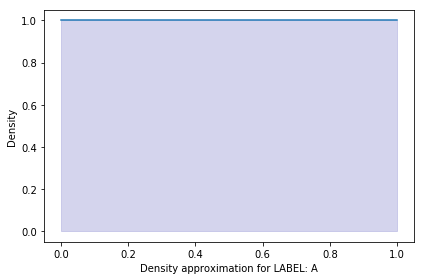

In [61]:
S.print_current_density_function()

# With Stratify, Multiple k idea

In [63]:
labels = alphabet
print(labels)  
print(len(labels))

testset = set(test_Writers)
print(len(testset))  # No of different writers

# TESTDATA[Writer] = [testImagesOfWriter, testLabelsOfWriter]; example: TESTDATA[9] = [testImages9, testLabels9]
TESTDATA = {} 
for writer in testset:
  TESTDATA[writer] = [[], []]
for i in range(0, len(test_Writers)):
    TESTDATA[test_Writers[i]][0].append(test_Images[i])
    TESTDATA[test_Writers[i]][1].append(test_Labels[i])

def find_minimal(i, vector):  # i is the ascii code: 48.49,...,65,66,...,97,...
  # Implicit use of dictionary ICentroids[ASCII]
  minindex = 0
  mineps = np.linalg.norm(vector-ICentroids[i][0])
  for j in range(1, ICentroids[i].shape[0]):  
    _mineps = np.linalg.norm(vector-ICentroids[i][j])
    if _mineps < mineps:
      mineps = _mineps
      minindex = j
      
  return ICentroids[i][minindex].copy()

['', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', "'", '.', ',', '-', '(', ')', '/']
70
25


In [0]:
winold = 0
equal = 0
winnew = 0
sumS = 0
sumS1 = 0
sumSboth = 0
sumN = 0
lenBetterOld = 0
lenBetterNew = 0

In [0]:
import math
ks = [2, 4, 6, 8, 10]  # outer object for configure get_min_label function and evaluation

def get_min_label(history, predicted_vector): # return list of predicted label for k in ks
  X_search = []
  y_search = []
  for (_predicted_label, _original_label) in history.keys():  # Na 90% mreza je rekla _predicted_label a bila je _original_label (imam vector i count)
      if _predicted_label == predicted_label:
        for _ in range(history[(_predicted_label, _original_label)][1]):
          X_search.append(history[(_predicted_label, _original_label)][0])
          y_search.append(_original_label)      
  
  results = {}
  for k in ks:
    if len(X_search)<k:  # if I cant do knn search with respect to specific k
      results[k] = None
    else:
      knn = KNeighborsClassifier(n_neighbors=k, metric='l2')  # empirically confirm; use heuristic instead of min
      knn.fit(X_search, y_search)
      results[k] = knn.predict(np.array([predicted_vector]))[0]
      
  return results # return dict of predictions for each k in ks [1, 2, 4, 6, 8]

# Who to believe in prediction
# input: (baseline prediction, baseline spectar, knns oredictions, knns spectars)
def who_to_believe(predicted_label, writer_network_spectar, min_labels, writer_knn_spectars): # Return optimal k or None if baseline is the best
  trust = [writer_network_spectar[predicted_label].get_mean()]
  for k in ks:
    if min_labels[k] is None: # no prediction for that k
      trust.append(-1)  # baseline is above 0 in any case
    else:
      trust.append(writer_knn_spectars[k][min_labels[k]].get_mean())  # mean of density approximation for predicted label for specific k 
    
  maxindex = trust.index(max(trust))
  if maxindex is 0:  # baseline is the best
    return None
  else:              # find proper k (-1 is ok cause of 0 index is for baseline)
    return ks[maxindex-1]

In [0]:
import random
from itertools import chain
from random import shuffle

# Helper function; Simulate unfair coin flip
def flip_a_unfair_coin(p): # p is for example 3/10 etc.
  return random.random()<p

# Hardcoded split 90%:10%
# Get images and labels of some writer, and create 90%:10% split
# return images and labels (same list) and also m (border line: [0, m), [m, n) split)
def stratify_me(images, labels):
  X_train = []  # train:test = 90%:10% of writer images
  X_test = []
  y_train = []
  y_test = []
  
  indexlabels = sorted(alphabet) # [48, 49, 50, ..., 65, 66, ..., 97, 98, ...]
  freqlabels = [[] for _ in indexlabels]  # 0-9, A-Z, a-z
  
  n = len(labels)  # size of writer pictures
  m = 0            # border for dynamic history ~int(0.9*n)+1
  
  for i in range(len(labels)):
    indx = indexlabels.index(labels[i])  # position in freqlabels with respect to ascii code of label
    freqlabels[indx].append(i)                # freqlabels[ascii_code_of_0] contains all indexes for label '0' in writer images
    
  for freq in freqlabels:
    shuffle(freq)
    
    # first part, enough label
    while len(freq)>=10:
      _freq = freq[:10]
      freq = freq[10:]
      
                                       # random choose one of ten images for evaluation (I can choose one index, but I want to shuffle also for dynamic history)
      X_test.append(images[_freq[0]])  # add one image for evaluation set
      y_test.append(labels[_freq[0]])
      for f in _freq[1:]:
        X_train.append(images[f])  # add nine images to dynamic istory set
        y_train.append(labels[f])
      m += 9                              # added nine images into dynamic history
    
    # second part, should I sample from tail (example 3 images instead of 10)
    if flip_a_unfair_coin(len(freq)/10)==True:
      X_test.append(images[freq[0]])
      y_test.append(labels[freq[0]])
      freq = freq[1:]
      
    for f in freq:
      X_train.append(images[f])
      y_train.append(labels[f])
    m += len(freq)  # added rest of the images into dynamic history set
    
  return X_train+X_test, y_train+y_test, m, n

In [72]:
%%time

for writer in TESTDATA.keys():   # [2, 665, 1369]: writer - current writer id
  #images9 = TESTDATA[writer][0]  # images9 - images of current writer
  #labels9 = TESTDATA[writer][1]  # labels9 - labels of current writer
  #n = len(images9)               
  #m = int(0.90*n)+1                 # 90% for dynaminc history, 10% for evaluation of new model
  images9, labels9, m, n = stratify_me(TESTDATA[writer][0], OH_L.decode_all(TESTDATA[writer][1]))
  
  
  #################################################### GET DYNAMIC HISTORY {(predicted_label, original_label):[[vector], count]}
  history = {}
  for i in range(0, m):
    original_label = labels9[i]
    predicted_label = OH_L.decode(recognizer.predict(np.array([images9[i]]))[0])
    predicted_vector = find_minimal(original_label, finder.predict(np.array([images9[i]]))[0])  
    if (predicted_label, original_label) not in history.keys():
      history[(predicted_label, original_label)]=[predicted_vector, 1]
    else:
      history[(predicted_label, original_label)][0] += predicted_vector
      history[(predicted_label, original_label)][1] += 1      
  for (x,y) in sorted(history.keys()):  # find AVG of predicted clusters; DROP THIS PART IN NEW VERSION; MLADEN IDEA
    history[(x,y)][0] /= history[(x,y)][1]  
  
  #################################################### GET SPECTARS
  writer_network_spectar = {}
  writer_knn_spectars = {}  # dict of dictionaries
  for k in ks:
    writer_knn_spectars[k] = {}  # spectars for each k in ks
  for l in labels:   # add statistic for character l to all spectars
    writer_network_spectar[l] = CharStatistic(l) # [0, 0]
    for k in ks:
      writer_knn_spectars[k][l] = CharStatistic(l)
    
  for i in range(0, m):
    original_label = labels9[i]
    predicted_label = OH_L.decode(recognizer.predict(np.array([images9[i]]))[0])
    predicted_vector = finder.predict(np.array([images9[i]]))[0]
    
    ##### writer_network_spectar
    if original_label == predicted_label:
      writer_network_spectar[predicted_label].update_one(1) # Network says predicted_label and its correct
    else:
      writer_network_spectar[predicted_label].update_one(0)  # Network says predicted_label and its wrong
         
    ##### writer_knn_spectar
    min_labels = get_min_label(history, predicted_vector)
    for k in ks:  # get min label is configured with respect to ks
      min_label = min_labels[k]
      if min_label is None:
        min_label = predicted_label  # min label je moje predvidjanje 
      if min_label == original_label:  # min_label je ono sto ja predvidjam na onih 10%; to i evaluiram 
        writer_knn_spectars[k][min_label].update_one(1)
      else:
        writer_knn_spectars[k][min_label].update_one(0)
  
  #################################################### GET S AND S1
  S = 0
  S1 = 0
  Sboth = 0
  N = len(labels9[m:n])
  for i in range(m, n):  # slow variant
    original_label = labels9[i]
    predicted_label = OH_L.decode(recognizer.predict(np.array([images9[i]]))[0]) # int(string like '48') -> ascii code
    predicted_vector = finder.predict(np.array([images9[i]]))[0]
    
    ##### S1; old one
    #print('NN DEBUG: predicted: ', predicted_label, 'original: ', original_label)
    #input()
    if predicted_label == original_label:
      S1 += 1
    predicted_label_bkp = predicted_label
    ##### S; new approach
    min_labels = get_min_label(history, predicted_vector)  # get list of predictions or each k
    k = who_to_believe(predicted_label, writer_network_spectar, min_labels, writer_knn_spectars)  # Choose who have biggest mean of all spectars, use it as a aprediction
    if k is not None and min_labels[k] is not None:  # believe to specific knn, which have it own prediction
      predicted_label = min_labels[k]  # new approach; change network prediction if knn is sure enough  
    if predicted_label == original_label:
      S += 1
  
    ##### Sboth
    if predicted_label_bkp == original_label or (k is not None and min_labels[k] is not None and min_labels[k]==original_label):
      Sboth+=1 
  
    ########## UPDATE history AND *spectar ##########
    # original_label OK
    predicted_label = predicted_label_bkp
    # predicted_vector OK 
    
    # history
    predicted_vector_bkp = find_minimal(original_label, predicted_vector)
    if (predicted_label, original_label) not in history.keys():
      history[(predicted_label, original_label)]=[predicted_vector_bkp, 1]
    else:
      history[(predicted_label, original_label)][0] = (history[(predicted_label, original_label)][0]*history[(predicted_label, original_label)][1]+predicted_vector_bkp)/(history[(predicted_label, original_label)][1]+1)
      history[(predicted_label, original_label)][1] += 1
    
    # writer_network_spectar
    if original_label == predicted_label:
      writer_network_spectar[predicted_label].update_one(1)  # Network says predicted_label and its correct
    else:
      writer_network_spectar[predicted_label].update_one(0)  # Network says predicted_label and its wrong
  
    # writer_knn_spectar
    min_labels = get_min_label(history, predicted_vector)  # prvo ga ubacim u istoriju - ali kao proseci itd. a onda kasnije trazim min_label; MOZDA INVERZNO? da ne bih nasao istog
    for k in ks:
      min_label = min_labels[k]
      if min_label is None:
        min_label = predicted_label  # min label je moje predvidjanje 
      if min_label == original_label:  # min_label je ono sto ja predvidjam na onih 10%; to i evaluiram 
        writer_knn_spectars[k][min_label].update_one(1)
      else:
        writer_knn_spectars[k][min_label].update_one(0)
    ########## END UPDATE ##########
    
  #################################################### PRINT AND UPDATE GLOBAL VALUES
  if S!=S1:  # Print only diff
    print("Writer {0:4d} == mynew: {1:d} ({2:3.2f}%) == old: {3:d} ({4:3.2f}%) == both: {5:d} ({6:3.2f}%), No. of images {7:d}, len(image9)={8:d}".format(writer, S, float(100*S)/N, S1, float(100*S1)/N, Sboth, float(100.0*Sboth)/N, N, n))
  sumS += S
  sumS1 += S1
  sumSboth += Sboth
  sumN += N   
  
  if S==S1:
    equal += 1
  elif S>S1:
    winnew += 1
    lenBetterNew += n
  else:
    winold += 1
    lenBetterOld += n   
    
  del history
  del writer_network_spectar
  del writer_knn_spectars

Writer 123526 == mynew: 131 (90.34%) == old: 127 (87.59%) == both: 132 (91.03%), No. of images 145, len(image9)=1446
Writer 10004 == mynew: 141 (95.92%) == old: 137 (93.20%) == both: 142 (96.60%), No. of images 147, len(image9)=1478
Writer 10005 == mynew: 132 (86.84%) == old: 121 (79.61%) == both: 133 (87.50%), No. of images 152, len(image9)=1539
Writer 123541 == mynew: 151 (95.57%) == old: 147 (93.04%) == both: 151 (95.57%), No. of images 158, len(image9)=1564
Writer 10135 == mynew: 135 (91.84%) == old: 132 (89.80%) == both: 137 (93.20%), No. of images 147, len(image9)=1443
Writer 10008 == mynew: 128 (88.89%) == old: 129 (89.58%) == both: 131 (90.97%), No. of images 144, len(image9)=1467
Writer 10010 == mynew: 101 (72.14%) == old: 88 (62.86%) == both: 104 (74.29%), No. of images 140, len(image9)=1435
Writer 10142 == mynew: 145 (90.62%) == old: 143 (89.38%) == both: 146 (91.25%), No. of images 160, len(image9)=1589
Writer 10143 == mynew: 143 (85.63%) == old: 146 (87.43%) == both: 147 (

In [73]:
print('winold: ', winold)
print('equal: ', equal)
print('winnew: ', winnew)
print('S: (new): ', 100.0*sumS/sumN)
print('S1: (old): ', 100.0*sumS1/sumN)
print('Sboth: (new): ', 100.0*sumSboth/sumN)
print('AVG len winold: ', 1.0*lenBetterOld/winold)
print('AVG len winnew: ', 1.0*lenBetterNew/winnew)
print('No of evaluation images: ', sumN)

winold:  2
equal:  3
winnew:  20
S: (new):  84.85411140583554
S1: (old):  81.59151193633953
Sboth: (new):  86.39257294429709
AVG len winold:  1560.5
AVG len winnew:  1502.75
No of evaluation images:  3770


# With resampling x5

In [74]:
labels = alphabet
print(labels)  
print(len(labels))

testset = set(test_Writers)
print(len(testset))  # No of different writers

# TESTDATA[Writer] = [testImagesOfWriter, testLabelsOfWriter]; example: TESTDATA[9] = [testImages9, testLabels9]
TESTDATA = {} 
for writer in testset:
  TESTDATA[writer] = [[], []]
for i in range(0, len(test_Writers)):
    TESTDATA[test_Writers[i]][0].append(test_Images[i])
    TESTDATA[test_Writers[i]][1].append(test_Labels[i])

def find_minimal(i, vector):  # i is the ascii code: 48.49,...,65,66,...,97,...
  # Implicit use of dictionary ICentroids[ASCII]
  minindex = 0
  mineps = np.linalg.norm(vector-ICentroids[i][0])
  for j in range(1, ICentroids[i].shape[0]):  
    _mineps = np.linalg.norm(vector-ICentroids[i][j])
    if _mineps < mineps:
      mineps = _mineps
      minindex = j
      
  return ICentroids[i][minindex].copy()

['', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', "'", '.', ',', '-', '(', ')', '/']
70
25


In [0]:
winold = 0
equal = 0
winnew = 0
sumS = 0
sumS1 = 0
sumSboth = 0
sumN = 0
lenBetterOld = 0
lenBetterNew = 0

In [0]:
import math
ks = [2, 4, 6, 8, 10]  # outer object for configure get_min_label function and evaluation

def get_min_label(history, predicted_vector): # return list of predicted label for k in ks
  X_search = []
  y_search = []
  for (_predicted_label, _original_label) in history.keys():  # Na 90% mreza je rekla _predicted_label a bila je _original_label (imam vector i count)
      if _predicted_label == predicted_label:
        for _ in range(history[(_predicted_label, _original_label)][1]):
          X_search.append(history[(_predicted_label, _original_label)][0])
          y_search.append(_original_label)      
  
  results = {}
  for k in ks:
    if len(X_search)<k:  # if I cant do knn search with respect to specific k
      results[k] = None
    else:
      knn = KNeighborsClassifier(n_neighbors=k, metric='l2')  # empirically confirm; use heuristic instead of min
      knn.fit(X_search, y_search)
      results[k] = knn.predict(np.array([predicted_vector]))[0]
      
  return results # return dict of predictions for each k in ks [1, 2, 4, 6, 8]

# Who to believe in prediction
# input: (baseline prediction, baseline spectar, knns oredictions, knns spectars)
def who_to_believe(predicted_label, writer_network_spectar, min_labels, writer_knn_spectars): # Return optimal k or None if baseline is the best
  trust = [writer_network_spectar[predicted_label].get_mean()]
  for k in ks:
    if min_labels[k] is None: # no prediction for that k
      trust.append(-1)  # baseline is above 0 in any case
    else:
      trust.append(writer_knn_spectars[k][min_labels[k]].get_mean())  # mean of density approximation for predicted label for specific k 
    
  maxindex = trust.index(max(trust))
  if maxindex is 0:  # baseline is the best
    return None
  else:              # find proper k (-1 is ok cause of 0 index is for baseline)
    return ks[maxindex-1]

In [0]:
import random
from itertools import chain
from random import shuffle

# Helper function; Simulate unfair coin flip
def flip_a_unfair_coin(p): # p is for example 3/10 etc.
  return random.random()<p

# Hardcoded split 90%:10%
# Get images and labels of some writer, and create 90%:10% split
# return images and labels (same list) and also m (border line: [0, m), [m, n) split)
def stratify_me(images, labels):
  X_train = []  # train:test = 90%:10% of writer images
  X_test = []
  y_train = []
  y_test = []
  
  indexlabels = sorted(alphabet) # [48, 49, 50, ..., 65, 66, ..., 97, 98, ...]
  freqlabels = [[] for _ in indexlabels]  # 0-9, A-Z, a-z
  
  n = len(labels)  # size of writer pictures
  m = 0            # border for dynamic history ~int(0.9*n)+1
  
  for i in range(len(labels)):
    indx = indexlabels.index(labels[i])  # position in freqlabels with respect to ascii code of label
    freqlabels[indx].append(i)                # freqlabels[ascii_code_of_0] contains all indexes for label '0' in writer images
    
  for freq in freqlabels:
    shuffle(freq)
    
    # first part, enough label
    while len(freq)>=10:
      _freq = freq[:10]
      freq = freq[10:]
      
                                       # random choose one of ten images for evaluation (I can choose one index, but I want to shuffle also for dynamic history)
      X_test.append(images[_freq[0]])  # add one image for evaluation set
      y_test.append(labels[_freq[0]])
      for f in _freq[1:]:
        X_train.append(images[f])  # add nine images to dynamic istory set
        y_train.append(labels[f])
      m += 9                              # added nine images into dynamic history
    
    # second part, should I sample from tail (example 3 images instead of 10)
    if flip_a_unfair_coin(len(freq)/10)==True:
      X_test.append(images[freq[0]])
      y_test.append(labels[freq[0]])
      freq = freq[1:]
      
    for f in freq:
      X_train.append(images[f])
      y_train.append(labels[f])
    m += len(freq)  # added rest of the images into dynamic history set
    
  return X_train+X_test, y_train+y_test, m, n

In [0]:
NoResample = 5

In [79]:
%%time

for writer in TESTDATA.keys():   # writer - current writer id
  #images9 = TESTDATA[writer][0]  # images9 - images of current writer
  #labels9 = TESTDATA[writer][1]  # labels9 - labels of current writer
  #n = len(images9)               
  #m = int(0.9*n)+1                 # 90% for dynaminc history, 10% for evaluation of new model
  
  S = 0      # no of images on which new method is correct
  S1 = 0     # no of images on which baseline network is correct
  Sboth = 0  # no of images on which either baseline or knn is correct
  Nall = 0   # no of evaluation images
  for _ in range(NoResample):  # Resample
    #################################################### STRATIFY AND SHUFFLE INTERNALLY 
    images9, labels9, m, n = stratify_me(TESTDATA[writer][0], OH_L.decode_all(TESTDATA[writer][1]))
    
    #################################################### GET DYNAMIC HISTORY {(predicted_label, original_label):[[vector], count]}
    history = {}
    for i in range(0, m):
      original_label = labels9[i]
      predicted_label = OH_L.decode(recognizer.predict(np.array([images9[i]]))[0])
      predicted_vector = find_minimal(original_label, finder.predict(np.array([images9[i]]))[0])  
      if (predicted_label, original_label) not in history.keys():
        history[(predicted_label, original_label)]=[predicted_vector, 1]
      else:
        history[(predicted_label, original_label)][0] += predicted_vector
        history[(predicted_label, original_label)][1] += 1      
    for (x,y) in sorted(history.keys()):  # find AVG of predicted clusters
      history[(x,y)][0] /= history[(x,y)][1]  
  
    #################################################### GET SPECTARS
    writer_network_spectar = {}
    writer_knn_spectars = {}  # dict of dictionaries
    for k in ks:
      writer_knn_spectars[k] = {}  # spectars for each k in ks
    for l in labels:   # add statistic for character l to all spectars
      writer_network_spectar[l] = CharStatistic(l) # [0, 0]
      for k in ks:
        writer_knn_spectars[k][l] = CharStatistic(l)
    
    for i in range(0, m):
      original_label = labels9[i]
      predicted_label = OH_L.decode(recognizer.predict(np.array([images9[i]]))[0])
      predicted_vector = finder.predict(np.array([images9[i]]))[0]
    
      ##### writer_network_spectar
      if original_label == predicted_label:
        writer_network_spectar[predicted_label].update_one(1)  # Network says predicted_label and its correct
      else:
        writer_network_spectar[predicted_label].update_one(0)  # Network says predicted_label and its wrong
         
      ##### writer_knn_spectar
      min_labels = get_min_label(history, predicted_vector)
      for k in ks:  # get min label is configured with respect to ks
        min_label = min_labels[k]
        if min_label is None:
          min_label = predicted_label  # min label je moje predvidjanje 
        if min_label == original_label:  # min_label je ono sto ja predvidjam na onih 10%; to i evaluiram 
          writer_knn_spectars[k][min_label].update_one(1)
        else:
          writer_knn_spectars[k][min_label].update_one(0)
  
    #################################################### GET S AND S1
    s = 0                  # tmp no of images on which knn is correct
    s1 = 0                 # tmp no of images on which baseline is correct
    sboth = 0              # tmp no of images on which either knn or baseline is correct
    N = len(labels9[m:n])  # tmp no of evaluation images
    for i in range(m, n): 
      original_label = labels9[i]
      predicted_label = OH_L.decode(recognizer.predict(np.array([images9[i]]))[0]) # int(string like '48') -> ascii code 48
      predicted_vector = finder.predict(np.array([images9[i]]))[0]
    
      ##### s1; old one
      if predicted_label == original_label:
        s1 += 1
      predicted_label_bkp = predicted_label
      ##### s; new approach
      min_labels = get_min_label(history, predicted_vector)  # get list of predictions or each k
      k = who_to_believe(predicted_label, writer_network_spectar, min_labels, writer_knn_spectars)  # Choose who have biggest mean of all spectars, use it as a aprediction
      if k is not None and min_labels[k] is not None:  # believe to specific knn, which have it own prediction
        predicted_label = min_labels[k]  # new approach; change network prediction if knn is sure enough  
      if predicted_label == original_label:
        s += 1
  
      ##### sboth
      if predicted_label_bkp == original_label or (k is not None and min_labels[k] is not None and min_labels[k]==original_label):
        sboth+=1 

      ########## UPDATE history AND *spectar ##########
      # original_label OK
      predicted_label = predicted_label_bkp
      # predicted_vector OK 
    
      # history
      predicted_vector_bkp = find_minimal(original_label, predicted_vector)  # smal bug; fixed; predicted vector is nearest cluster/avg of clusters not next tot last
      if (predicted_label, original_label) not in history.keys():
        history[(predicted_label, original_label)]=[predicted_vector_bkp, 1]
      else:
        history[(predicted_label, original_label)][0] = (history[(predicted_label, original_label)][0]*history[(predicted_label, original_label)][1]+predicted_vector_bkp)/(history[(predicted_label, original_label)][1]+1)
        history[(predicted_label, original_label)][1] += 1
    
      # writer_network_spectar
      if original_label == predicted_label:
        writer_network_spectar[predicted_label].update_one(1)  # Network says predicted_label and its correct
      else:
        writer_network_spectar[predicted_label].update_one(0)  # Network says predicted_label and its wrong
  
      # writer_knn_spectar
      min_labels = get_min_label(history, predicted_vector)  # prvo ga ubacim u istoriju - ali kao proseci itd. a onda kasnije trazim min_label; MOZDA INVERZNO? da ne bih nasao istog
      for k in ks:
        min_label = min_labels[k]
        if min_label is None:
          min_label = predicted_label  # min label je moje predvidjanje 
        if min_label == original_label:  # min_label je ono sto ja predvidjam na onih 10%; to i evaluiram 
          writer_knn_spectars[k][min_label].update_one(1)
        else:
          writer_knn_spectars[k][min_label].update_one(0)
      ########## END UPDATE ##########        
        
        
    S += s
    S1 += s1
    Sboth += sboth
    Nall += N
    del history
    del writer_network_spectar
    del writer_knn_spectars
    # images9, labels9 = shuffle_both(images9, labels9)  # shuffle images for resampling; final 10% i use for evaluation, first 90% for dynamic history; DONT USE ANYMORE

  #################################################### PRINT AND UPDATE GLOBAL VALUES
  if S!=S1:  # Print only diff
    print("Writer {0:4d} == mynew: {1:d} ({2:3.2f}%) == old: {3:d} ({4:3.2f}%) == both: {5:d} ({6:3.2f}%), No. of images {7:d}, len(image9)={8:d}".format(writer, S, float(100*S)/Nall, S1, float(100*S1)/Nall, Sboth, float(100.0*Sboth)/Nall, Nall, n))
  sumS += S
  sumS1 += S1
  sumSboth += Sboth
  sumN += Nall
  
  if S==S1:     # Update win counts
    equal += 1
  elif S>S1:
    winnew += 1
    lenBetterNew += n
  else:
    winold += 1
    lenBetterOld += n

Writer 123526 == mynew: 644 (89.69%) == old: 639 (89.00%) == both: 649 (90.39%), No. of images 718, len(image9)=1446
Writer 10004 == mynew: 696 (94.69%) == old: 695 (94.56%) == both: 710 (96.60%), No. of images 735, len(image9)=1478
Writer 10005 == mynew: 642 (83.70%) == old: 614 (80.05%) == both: 659 (85.92%), No. of images 767, len(image9)=1539
Writer 123541 == mynew: 726 (93.56%) == old: 707 (91.11%) == both: 730 (94.07%), No. of images 776, len(image9)=1564
Writer 10135 == mynew: 687 (93.47%) == old: 666 (90.61%) == both: 691 (94.01%), No. of images 735, len(image9)=1443
Writer 10008 == mynew: 644 (87.26%) == old: 625 (84.69%) == both: 658 (89.16%), No. of images 738, len(image9)=1467
Writer 10010 == mynew: 492 (68.52%) == old: 436 (60.72%) == both: 510 (71.03%), No. of images 718, len(image9)=1435
Writer 10142 == mynew: 743 (93.22%) == old: 748 (93.85%) == both: 751 (94.23%), No. of images 797, len(image9)=1589
Writer 10143 == mynew: 738 (89.89%) == old: 728 (88.67%) == both: 749 

In [80]:
print('winold: ', winold)
print('equal: ', equal)
print('winnew: ', winnew)
print('S: (new): ', 100.0*sumS/sumN)
print('S1: (old): ', 100.0*sumS1/sumN)
print('Sboth: (new): ', 100.0*sumSboth/sumN)
print('AVG len winold: ', 1.0*lenBetterOld/winold)
print('AVG len winnew: ', 1.0*lenBetterNew/winnew)
print('No of evaluation images: ', sumN)

winold:  2
equal:  0
winnew:  23
S: (new):  84.98246359868212
S1: (old):  82.20852375385269
Sboth: (new):  86.81581464555214
AVG len winold:  1536.0
AVG len winnew:  1503.7391304347825
No of evaluation images:  18818
